# Excersize

Finish MNIST kaggle chalange using CNN.

https://www.kaggle.com/c/digit-recognizer

Description

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import keras

C:\Users\Alicja\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_rows, img_cols = 28, 28
num_classes = 10
num_epochs=12

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [3]:
train_file = "MNIST_train.csv"
raw_data = pd.read_csv(train_file)

x, y = data_prep(raw_data)

In [4]:
raw_data.shape

(42000, 785)

## Train Model

In [5]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D





model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x, y,
          batch_size=128,
          epochs=num_epochs,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/12
33600/33600 [==============================] - 44s 1ms/step - loss: 0.3317 - acc: 0.8987 - val_loss: 0.0906 - val_acc: 0.9729
Epoch 2/12
33600/33600 [==============================] - 44s 1ms/step - loss: 0.1190 - acc: 0.9632 - val_loss: 0.0611 - val_acc: 0.9793
Epoch 3/12
33600/33600 [==============================] - 44s 1ms/step - loss: 0.0885 - acc: 0.9735 - val_loss: 0.0518 - val_acc: 0.9819
Epoch 4/12
33600/33600 [==============================] - 44s 1ms/step - loss: 0.0697 - acc: 0.9788 - val_loss: 0.0479 - val_acc: 0.9835
Epoch 5/12
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0561 - acc: 0.9824 - val_loss: 0.0471 - val_acc: 0.9851
Epoch 6/12
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0479 - acc: 0.9853 - val_loss: 0.0461 - val_acc: 0.9856
Epoch 7/12
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0428 - acc: 0.9868 - val_loss: 0.0480 - val_acc:

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [39]:
model.save('MNIST.h5')

In [7]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


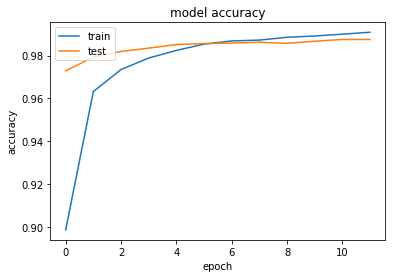

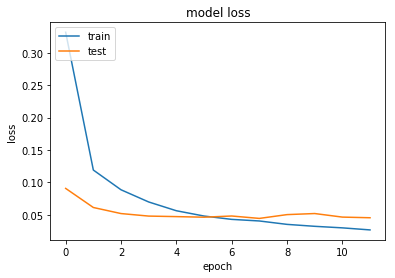

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
raw_x = pd.read_csv('MNIST_test.csv')

In [41]:

num_images = raw_x.shape[0]
x_test_array = raw_x.values[:]
x_test_shaped_array = x_test_array.reshape(num_images, img_rows, img_cols, 1)
x_test = x_test_shaped_array / 255
y_test = model.predict(x_test)

In [42]:
model.evaluate(x_test, y_test, batch_size=16)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

28000/28000 [==============================] - 16s 583us/step
Test loss: 0.02498527174397272
Test accuracy: 1.0


In [43]:
y_cat = y_test.argmax(axis=-1)

In [44]:
len(y_cat)

28000

In [45]:
submission = pd.DataFrame(y_cat, columns=['Label'], index=range(1, y_cat.shape[0]+1))

In [46]:
submission.reset_index(inplace=True)

In [47]:
submission.columns = ['ImageId', 'Label']

In [48]:
submission.to_csv('MNIST_submisison.csv', header=True, index=False)